### Baseball Case Study
**Problem Statement:**<br>
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: 
- Runs, 
- At Bats, 
- Hits, 
- Doubles, 
- Triples, 
- Homeruns, 
- Walks, 
- Strikeouts, 
- Stolen Bases, 
- Runs Allowed, 
- Earned Runs, 
- Earned Run Average (ERA), 
- Shutouts, 
- Saves, 
- Complete Games
- Errors

#### Output: Number of predicted wins (W)


In [19]:
## Importing required liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [20]:
## Reading the dataset
data=pd.read_csv('baseball.csv')
## Saving a copy of the original dataset
data_copy=data

In [21]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [22]:
data.shape

(30, 17)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


- we have 16 features & all of them have numeric data
- 'W' (Number of predicted wins) is our label/target
- we have 30 observations

In [24]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

**dataset is not missing any values**

## EDA and Data Cleaning

In [25]:
## Checking the statistical summery of the dataset
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


- 'RA', 'ERA' 'CG' and 'SHO' seems to be little skewed
- All other features seem normally distributed but need to confirm this with further analysis

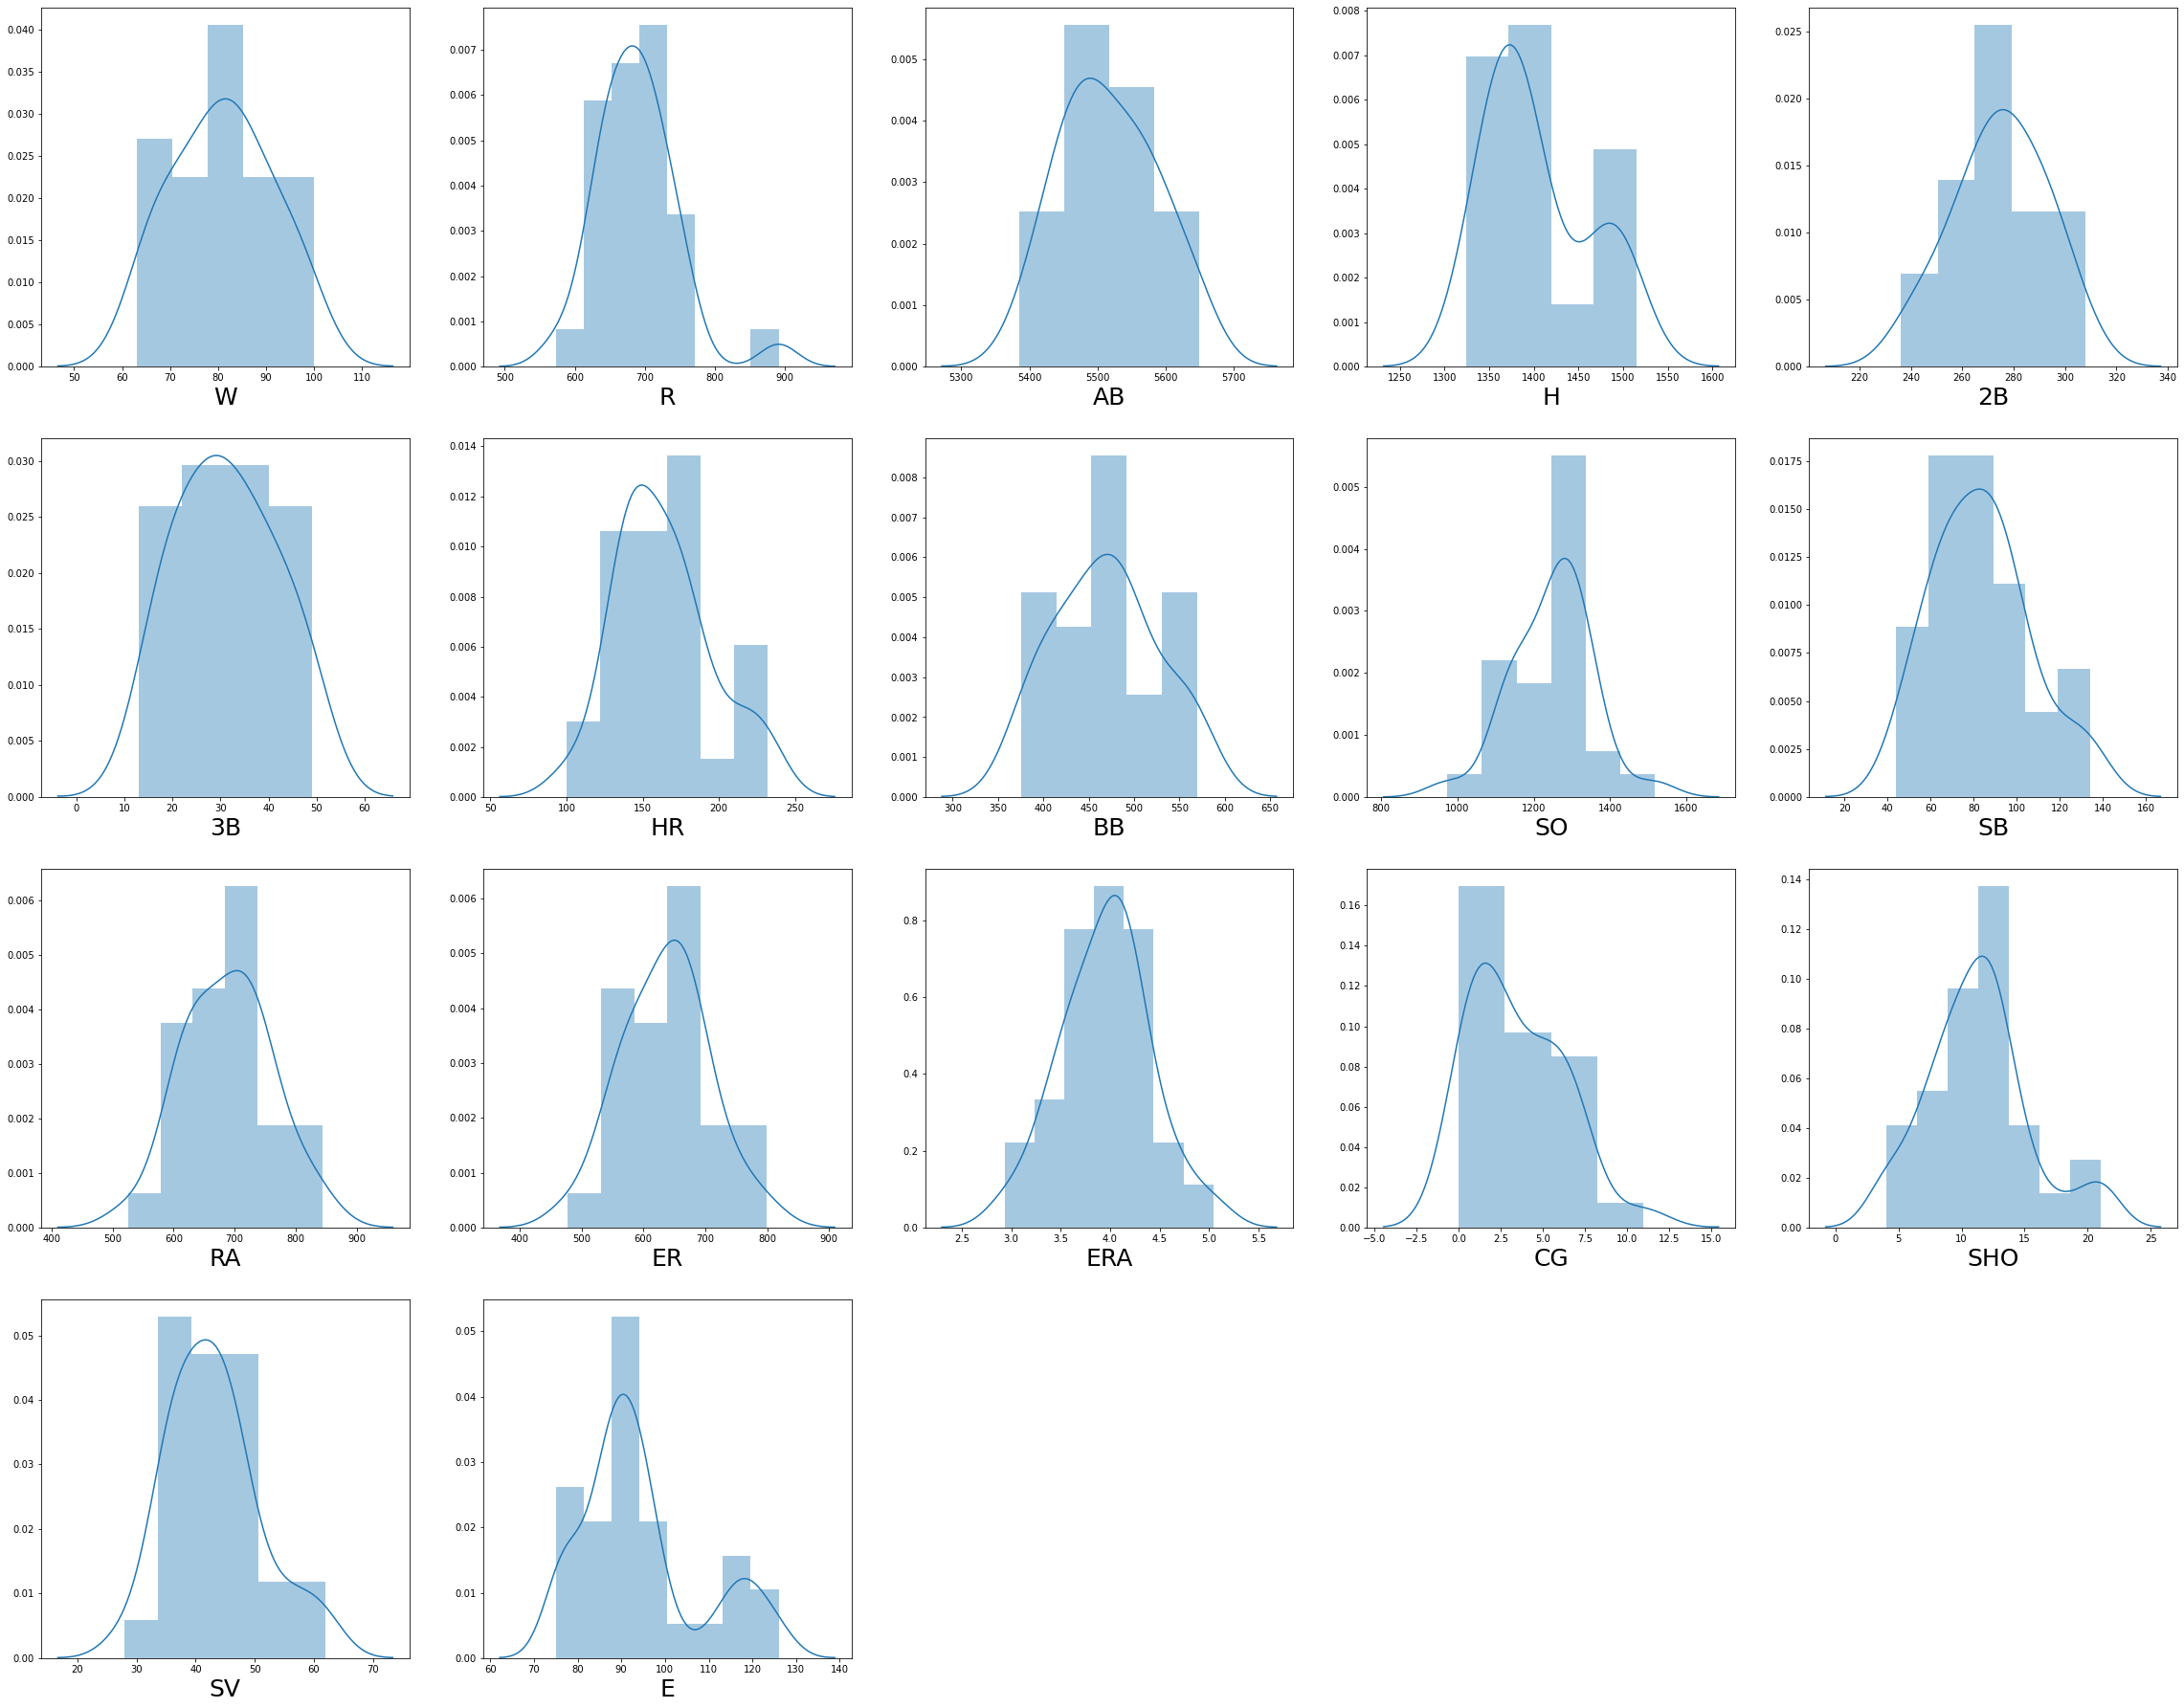

In [26]:
plt.figure(figsize=(40,40))
plot_number=1

for i in data:
    if plot_number<18:
        ax=plt.subplot(5,5,plot_number)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=25)
    plot_number+=1

In [27]:
X.skew()

NameError: name 'X' is not defined

**'H', 'HR', 'CG', 'SHO', 'SV', 'E' have skewness**

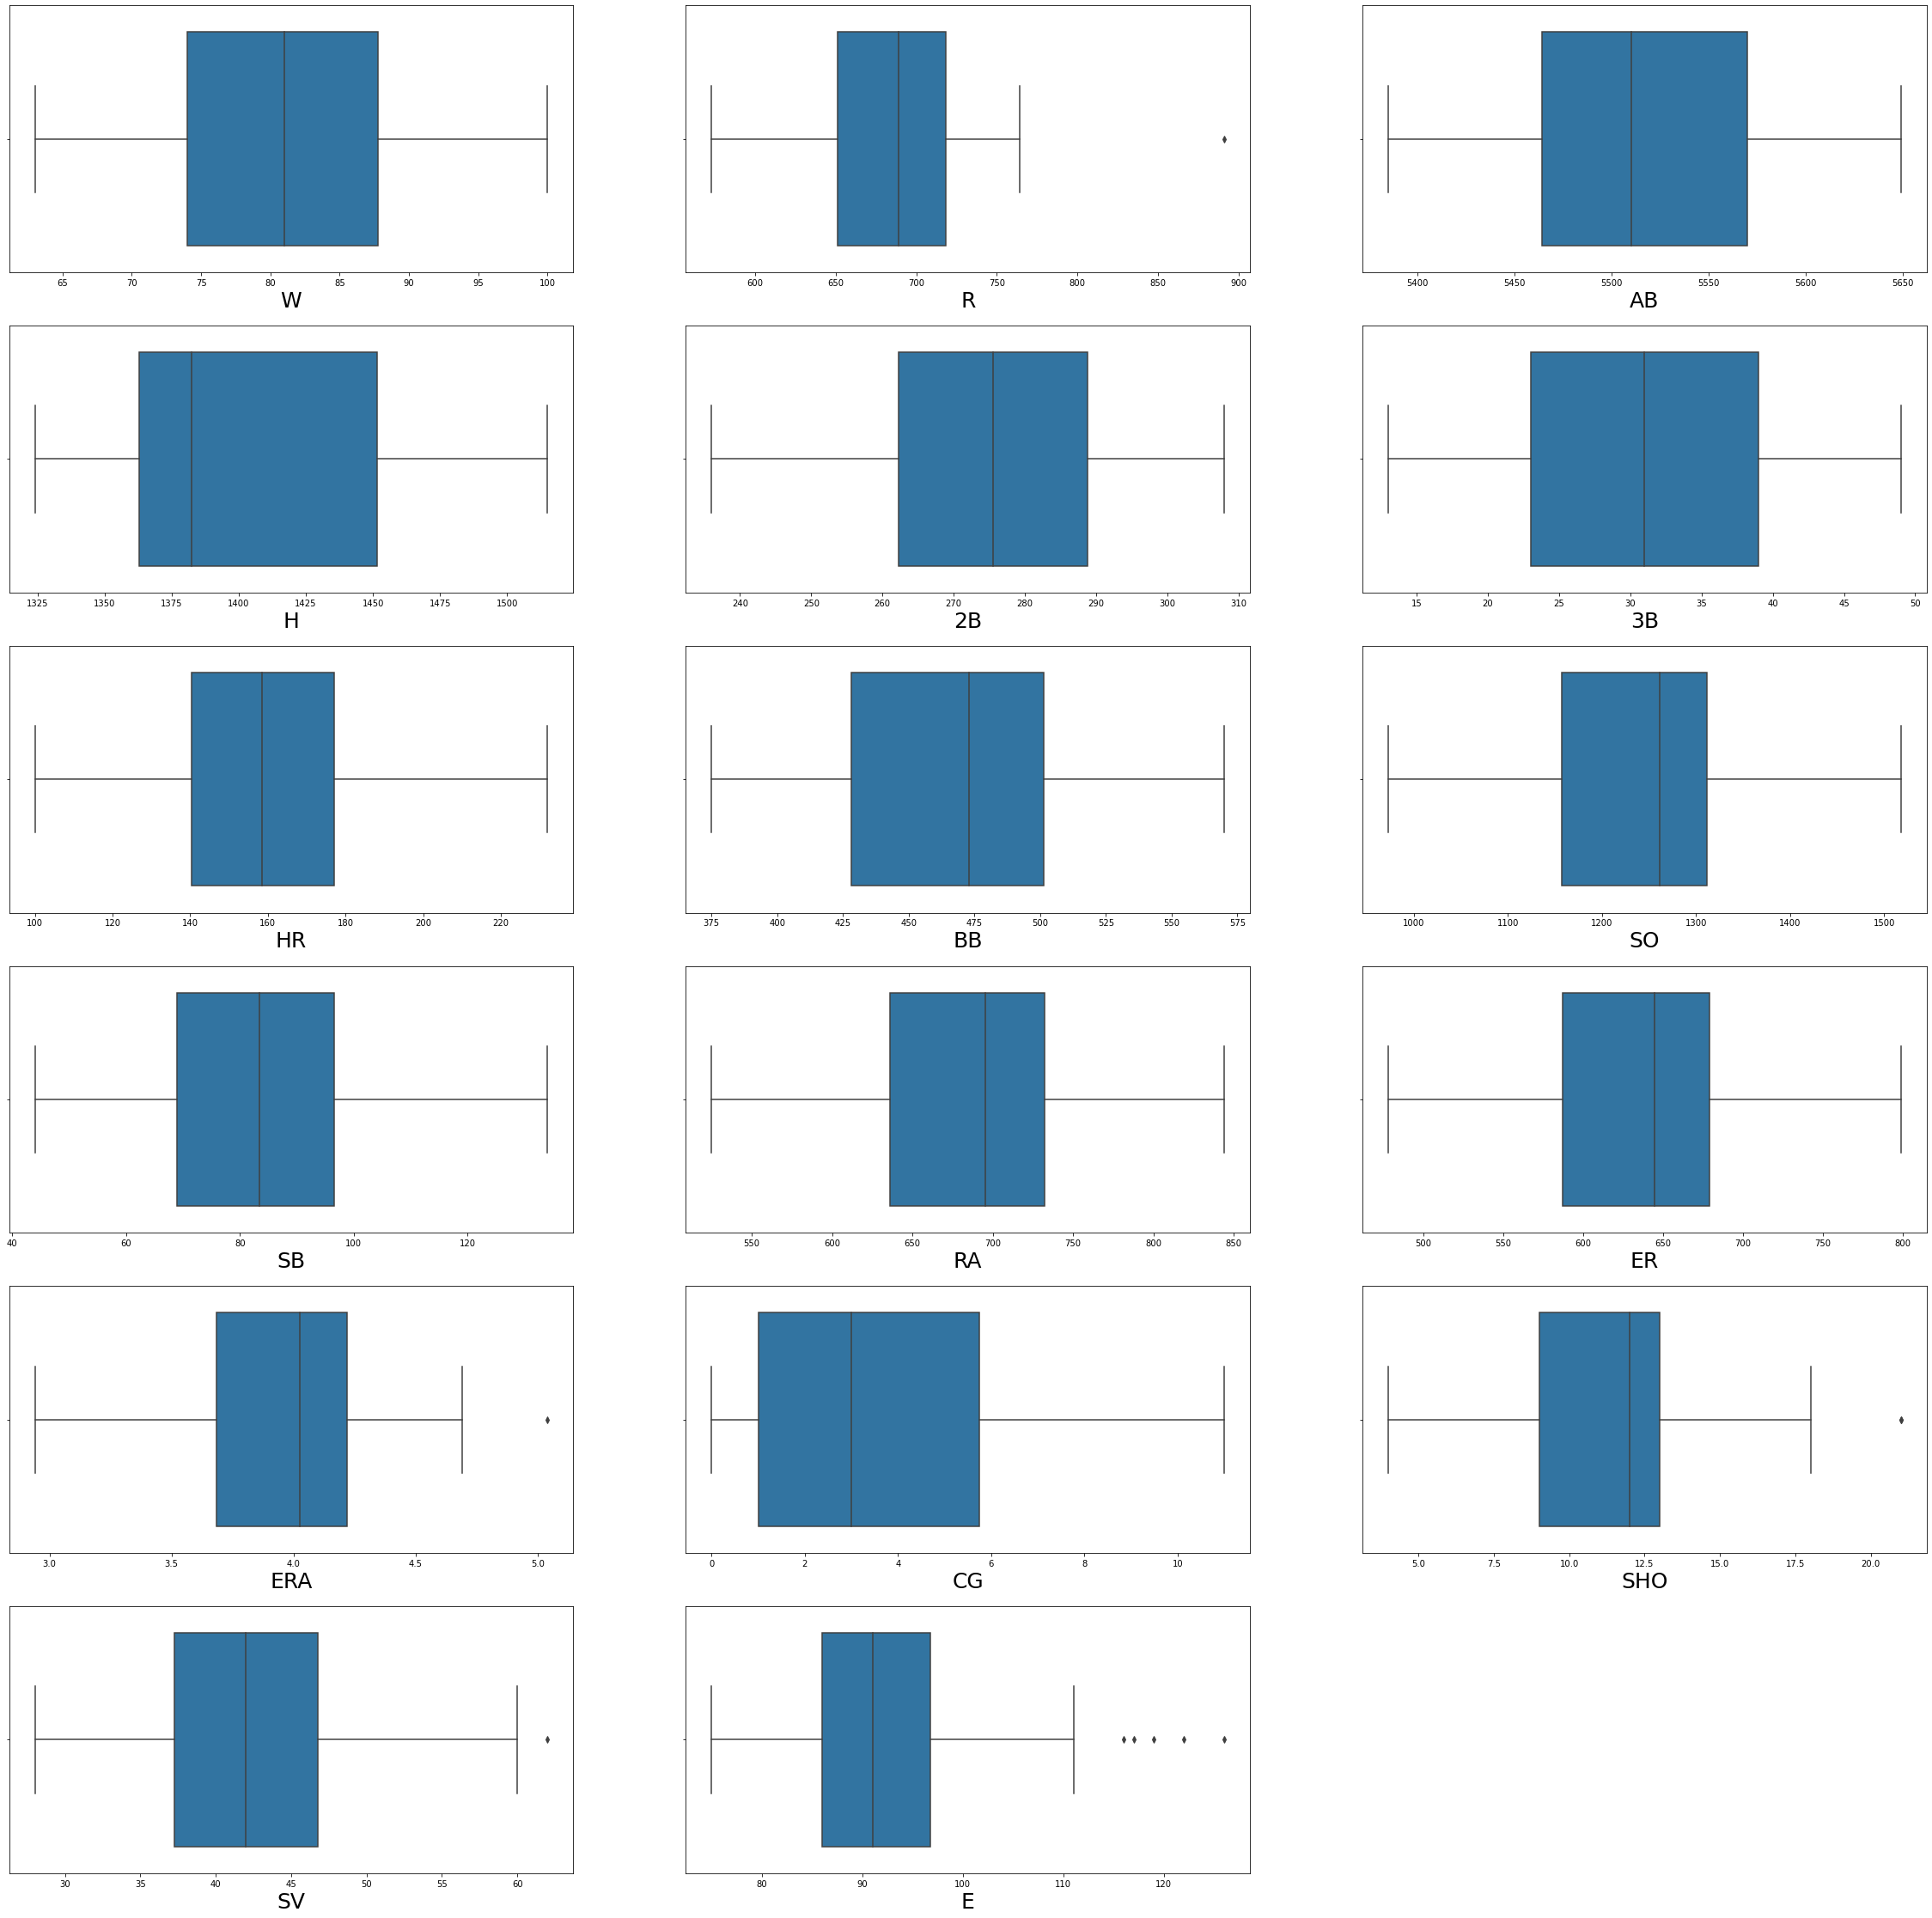

In [28]:
## Checking for outliers

plt.figure(figsize=(40,40))
plot_number=1

for i in data:
    if plot_number<18:
        ax=plt.subplot(6,3,plot_number)
        sns.boxplot(data[i])
        plt.xlabel(i,fontsize=25)
    plot_number+=1

**'R', 'ERA', 'SHO', 'SV' and 'E' have outliers**

Based on the above boxplot of 'E':
- We would lose too many data points (5) if we remove outliers beyond (Q3+1.5*IQR) which is not desirable as we already very less observations (30).

In [29]:
# rejecting data beyond 3 std to manage skewness and outliers
from scipy.stats import zscore

z_score=zscore(data[['R','ERA','SHO','SV','E']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]

data.shape

(29, 17)

In [30]:
data.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [31]:
data.loc[:,['HR']]=np.sqrt(data['HR']) 
data.loc[:,['CG']]=np.sqrt(data['CG']) 
data.loc[:,['SHO']]=np.sqrt(data['SHO']) 
data.loc[:,['SV']]=np.sqrt(data['SV']) 

In [32]:
data.loc[:,['H']]=np.log(data['H'])
data.loc[:,['E']]=np.log(data['E']) 

In [33]:
data.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738423
2B    -0.335304
3B     0.090124
HR     0.186909
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.260678
SHO   -0.085802
SV     0.370280
E      0.583308
dtype: float64

- Some skewness is still left in 'H' and 'E' which we will ignore.

In [34]:
X=data.drop('W',axis=1)
y=data['W']

#### Checking the relationship between features and the label

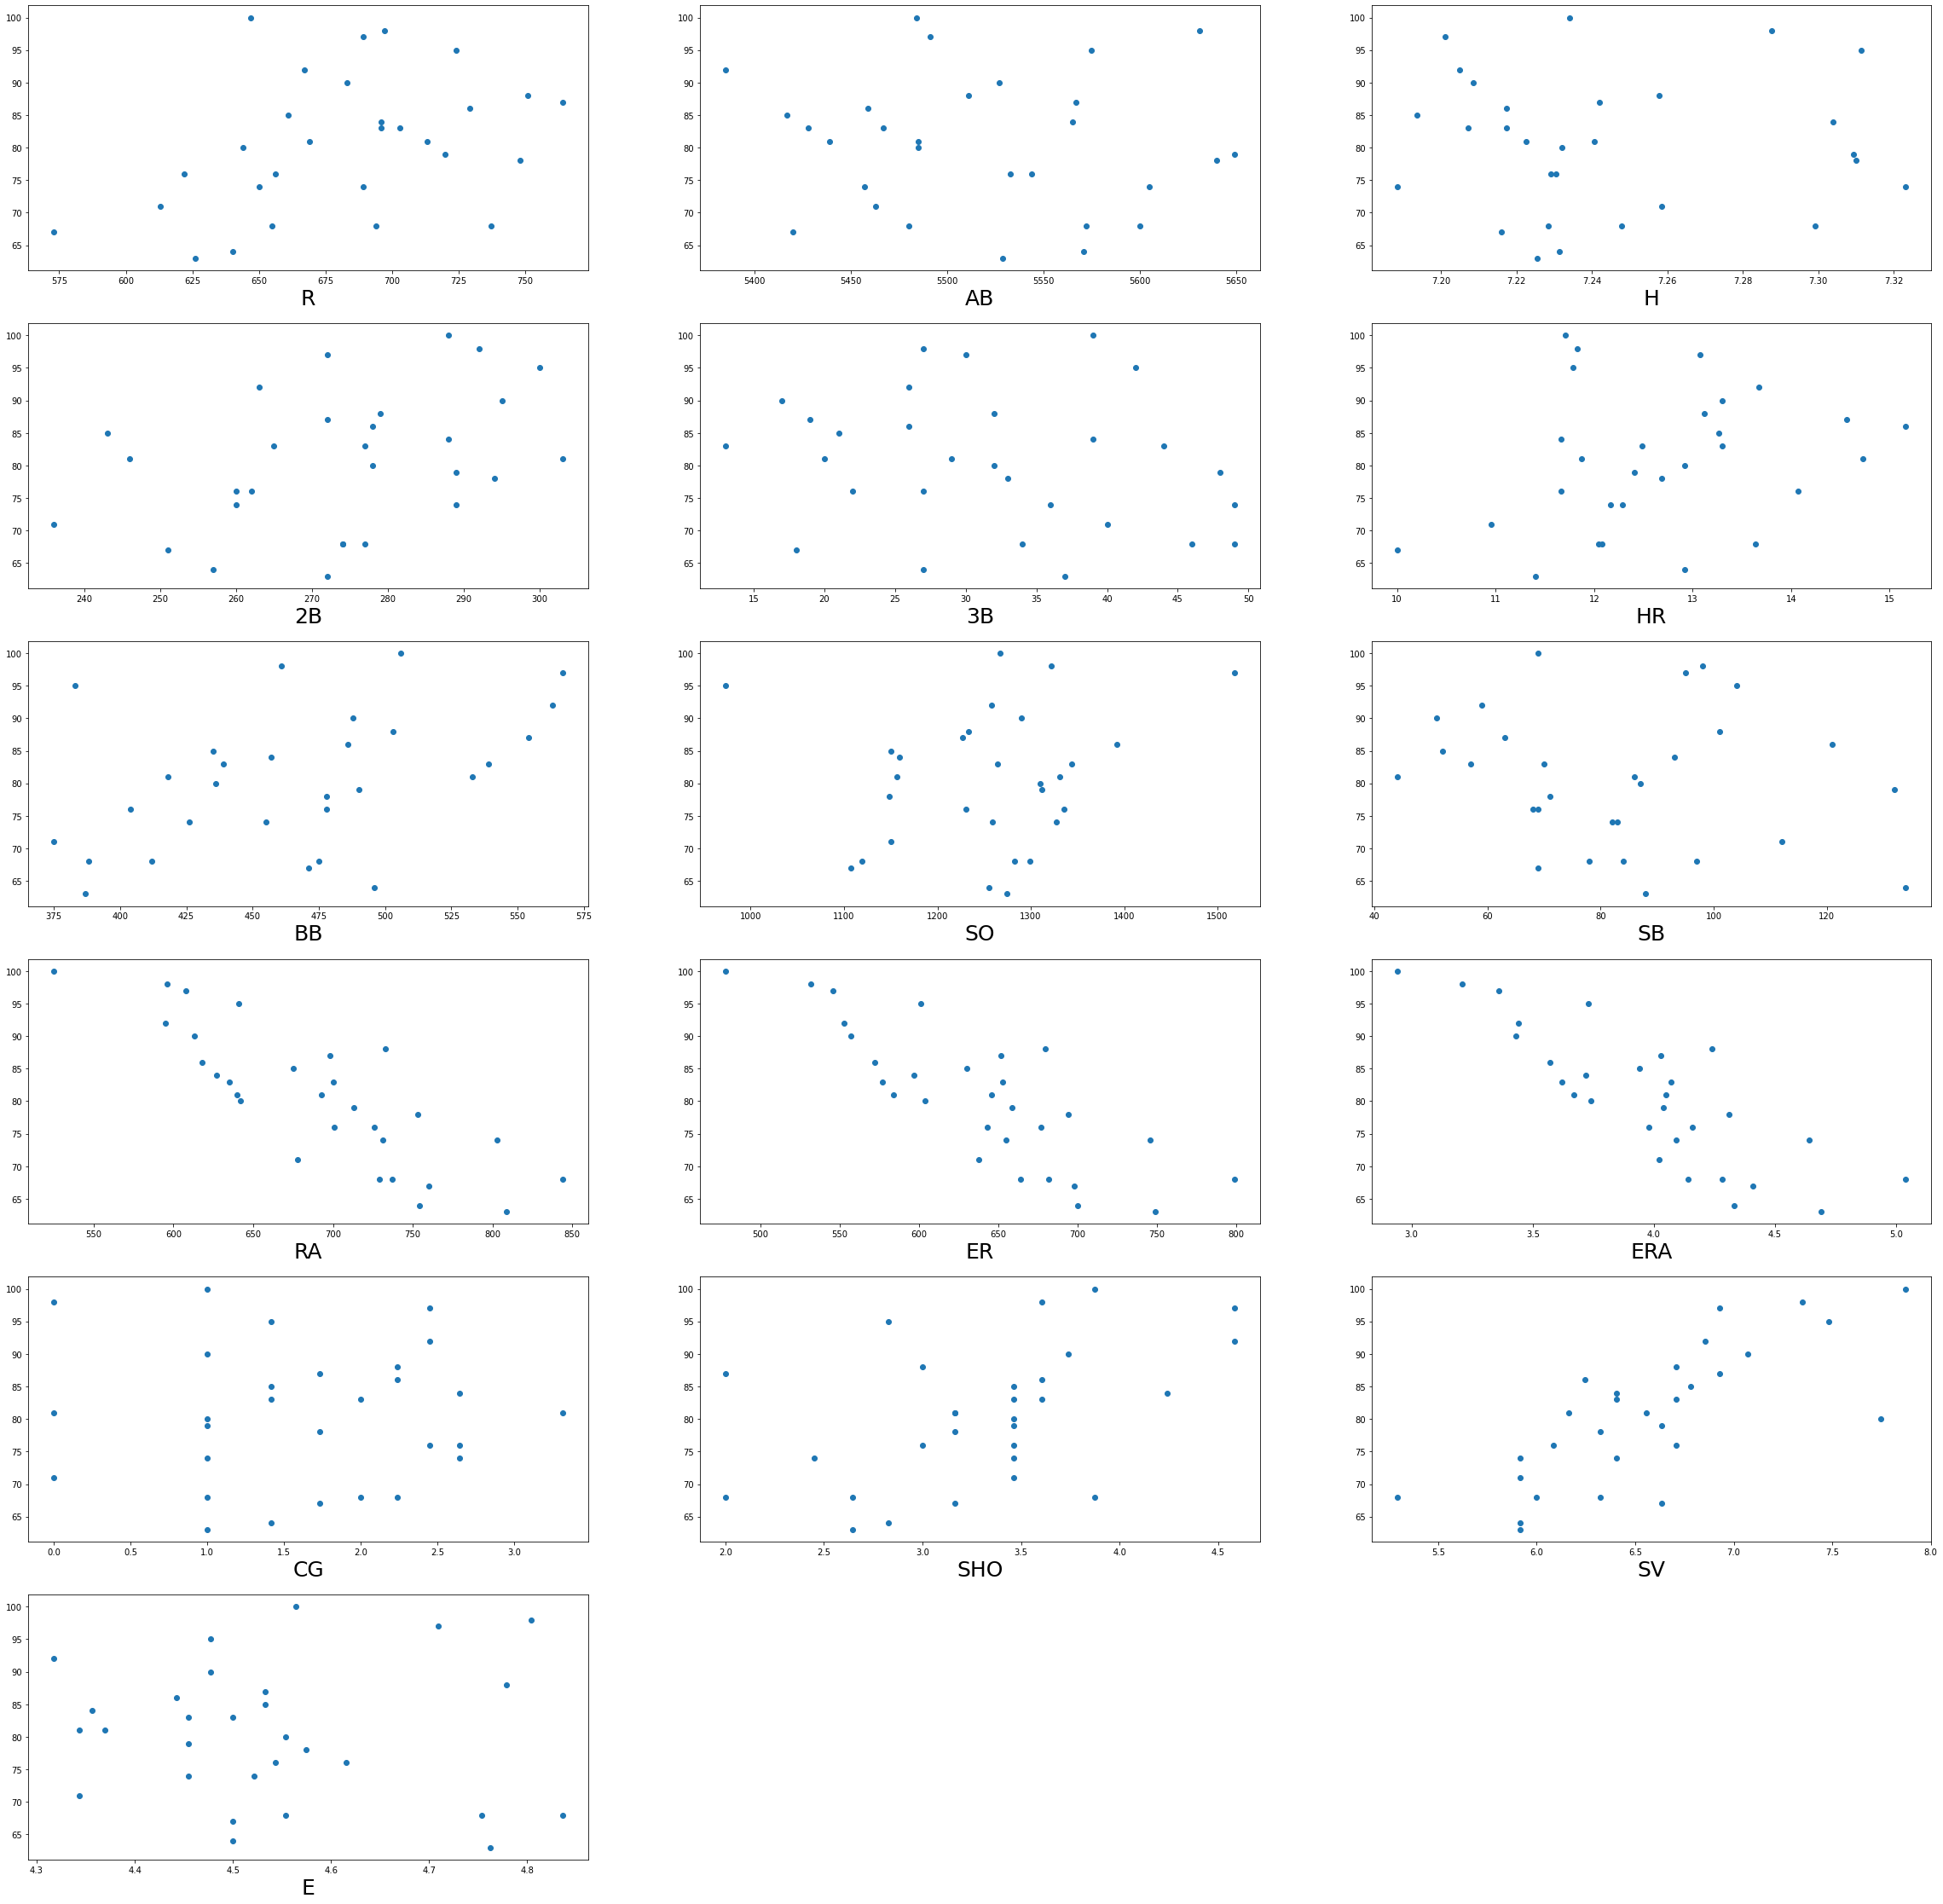

In [35]:
plt.figure(figsize=(40,40))
plot_number=1

for i in X:
    if plot_number<18:
        ax=plt.subplot(6,3,plot_number)
        plt.scatter(X[i],y)
        plt.xlabel(i,fontsize=25)
    plot_number+=1

In [36]:
X.corrwith(y)

R      0.390451
AB    -0.085780
H     -0.020787
2B     0.384886
3B    -0.206737
HR     0.255310
BB     0.447513
SO     0.156469
SB    -0.169503
RA    -0.823176
ER    -0.815308
ERA   -0.826952
CG    -0.003340
SHO    0.477949
SV     0.754886
E     -0.075036
dtype: float64

- **'AB', 'H', 'CG', 'E' shows very weak relationship with the label. Hence we will drop them.**
- **'RA', 'ER', 'ERA', 'SV' shows strong relationship with the label.**

In [37]:
X=X.drop(['AB', 'H', 'CG', 'E'],axis=1)

In [38]:
X.shape

(29, 12)

#### Scaling the features

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

### Splitting the data into training and testing sets

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

#### Importing Regression Performance Metrics

In [41]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

### Model 1: Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [43]:
lr.fit(X_train,y_train)

LinearRegression()

In [44]:
y_lr=lr.predict(X_test)

In [45]:
lr_score=r2_score(y_test,y_lr)
lr_score

0.7289238810199407

In [46]:
lr_rmse=np.sqrt(mean_squared_error(y_test,y_lr))
lr_rmse

5.110153239229953

In [47]:
lr_rmae=np.sqrt(mean_absolute_error(y_test,y_lr))
lr_rmae

1.9728965207926081

## Model 2: Lasso Regression

In [48]:
## Importing Lasso, Ridge, LassoCV and RidgeCV
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [49]:
lassoCV=LassoCV(alphas=None, max_iter=1000, normalize=True)

In [50]:
lassoCV.fit(X_train,y_train)

LassoCV(normalize=True)

In [51]:
alphaL=lassoCV.alpha_
alphaL

0.1113235979175792

In [52]:
lasso=Lasso(alphaL)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1113235979175792)

In [53]:
lasso_score=lasso.score(X_test,y_test)
lasso_score

0.7904930802017782

In [54]:
y_lasso=lasso.predict(X_test)

In [55]:
lasso_rmse=np.sqrt(mean_squared_error(y_test,y_lasso))
lasso_rmse

4.492493732946328

In [56]:
lasso_rmae=np.sqrt(mean_absolute_error(y_test,y_lasso))
lasso_rmae

1.7735495214822472

## Model 3: Ridge Regression

In [57]:
ridgeCV=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)

In [58]:
ridgeCV.fit(X_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [59]:
alphaR=ridgeCV.alpha_
alphaR

0.09099999999999998

In [60]:
ridge=Ridge(alphaR)
ridge.fit(X_train,y_train)

Ridge(alpha=0.09099999999999998)

In [61]:
y_ridge=ridge.predict(X_test)

In [62]:
ridge_Score=r2_score(y_test,y_ridge)
ridge_Score

0.7896737196895365

In [63]:
ridge_rmse=np.sqrt(mean_squared_error(y_test,y_ridge))
ridge_rmse

4.501270006332433

In [64]:
ridge_rmae=np.sqrt(mean_absolute_error(y_test,y_ridge))
ridge_rmae

1.7578875172148767

## Model 4: KNN

In [65]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [66]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [67]:
y_knn=knn.predict(X_test)

In [68]:
knn_score=r2_score(y_test,y_knn)
knn_score

0.6267820069204153

In [69]:
knn_rmse=np.sqrt(mean_squared_error(y_test,y_knn))
knn_rmse

5.996109850005529

In [70]:
knn_rmae=np.sqrt(mean_absolute_error(y_test,y_knn))
knn_rmae

2.345207879911715

## Model 5: SVR

In [71]:
from sklearn.svm import SVR
svr=SVR()

In [72]:
svr.fit(X_train,y_train)

SVR()

In [73]:
y_svr=svr.predict(X_test)

In [74]:
svr_score=r2_score(y_test,y_svr)
svr_score

0.16194384824639463

In [75]:
svr_rmse=np.sqrt(mean_squared_error(y_test,y_svr))
svr_rmse

8.985140100128136

In [76]:
svr_rmae=np.sqrt(mean_absolute_error(y_test,y_svr))
svr_rmae

2.7642284123157568

## Model 6: Radom Forest

In [77]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [78]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [79]:
y_rf=rf.predict(X_test)

In [80]:
rf_score=r2_score(y_test,y_rf)
rf_score

0.4927974048442909

In [81]:
rf_rmse=np.sqrt(mean_squared_error(y_test,y_rf))
rf_rmse

6.990029804419052

In [82]:
rf_rmae=np.sqrt(mean_absolute_error(y_test,y_rf))
rf_rmae

2.3822258499143185

**Storing all performance metrics in a single dataframe**

In [84]:
metrics=pd.DataFrame()
metrics['Model']=['Linear Regressor','Lasso Regressor','Ridge Regressor','KNN','SVR','RandomForest Regressor']
metrics['R2 Score']=[lr_score,lasso_score,ridge_Score,knn_score,svr_score,rf_score]
metrics['RMSE']=[lr_rmse,lasso_rmse,ridge_rmse,knn_rmse,svr_rmse,rf_rmse]
metrics['RMAE']=[lr_rmae,lasso_rmae,ridge_rmae,knn_rmae,svr_rmae,rf_rmae]

In [86]:
metrics.nlargest(6,'R2 Score')

,Model,R2 Score,RMSE,RMAE
1,Lasso Regressor,0.790493,4.492494,1.773550
2,Ridge Regressor,0.789674,4.501270,1.757888
0,Linear Regressor,0.728924,5.110153,1.972897
3,KNN,0.626782,5.996110,2.345208
5,RandomForest Regressor,0.492797,6.990030,2.382226
4,SVR,0.161944,8.985140,2.764228


**Based on the above metrics comparision, 'Lasso Regressor' is our best model**

Text(0.5, 1.0, 'Actual vs Predicted')

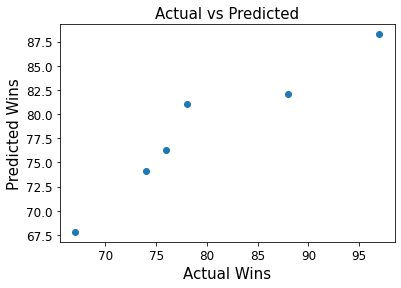

In [88]:
parameters = {'ytick.labelsize': 12,
          'xtick.labelsize': 12,'axes.labelsize': 15,
          'axes.titlesize': 15}
plt.rcParams.update(parameters)



plt.scatter(y_test,y_lasso)
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual vs Predicted')

**Saving our best model**

In [397]:
import pickle
filename='BaseBall_WinPred_Lasso.pkl'
pickle.dump(lasso,open(filename,'wb'))